# Demand Forecasting for Flights and Hotels

**Problem Statement**: How can we accurately forecast the demand for flights bookings to optimize inventory and pricing?

### Data Features:

* Historical booking data (number of bookings per day/week/month)
* External factors (economic indicators, weather conditions, public events)

### Importing data and Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
flight_data = pd.read_csv("/content/flight.xlsx - Sheet1.csv")
flight_data = flight_data.drop(columns=['Dep_Time', 'Arrival_Time'])
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Additional_Info  13354 non-null  object 
 6   Price            10683 non-null  float64
dtypes: float64(1), object(6)
memory usage: 730.4+ KB


In [36]:
data = flight_data.copy()

# Create a date range from 1st March 2019 to 31st March 2020
dates = pd.date_range(start='2019-03-01', end='2020-03-31')

# Initialize an empty list to store extended data
extended_data_list = []

# Loop through each date and add rows to the list
for date in dates:
    # Determine the number of flights for the current date
    if date.year == 2019:
        flight_count = np.random.randint(150, 650)
    elif date.year == 2020 and date.month == 1:
        flight_count = np.random.randint(100, 450)
    elif date.year == 2020 and date.month == 2:
        flight_count = np.random.randint(100, 350)
    else:
        flight_count = np.random.randint(50, 100)

    # Sample data for the current date
    sampled_data = data.sample(n=flight_count, replace=True)

    # Assign the current date to Date_of_Journey
    sampled_data['Date_of_Journey'] = date

    # Append to the list
    extended_data_list.append(sampled_data)

# Concatenate the list into a single DataFrame
df_extended = pd.concat(extended_data_list, ignore_index=True)

# Simulate the decline in demand for 2020
# Assuming the 'Price' column is used to reflect demand
decline_factor = 0.8  # 20% decline in 2020
df_extended['Year'] = df_extended['Date_of_Journey'].dt.year
df_extended.loc[df_extended['Year'] == 2020, 'Price'] *= decline_factor

# Drop the 'Year' column as it was only used for the decline simulation
df_extended.drop(columns=['Year'], inplace=True)

# Ensure all columns are in the correct dtype
df_extended['Date_of_Journey'] = pd.to_datetime(df_extended['Date_of_Journey'])
df_extended['Price'] = df_extended['Price'].astype(float)

In [37]:
df_extended

,Airline,Date_of_Journey,Source,Destination,Route,Additional_Info,Price
0,IndiGo,2019-03-01,Delhi,Cochin,DEL → LKO → COK,No info,7189.0
1,Air India,2019-03-01,Mumbai,Hyderabad,BOM → HYD,No info,3100.0
2,IndiGo,2019-03-01,Banglore,New Delhi,BLR → DEL,No info,7648.0
3,Air India,2019-03-01,Delhi,Cochin,DEL → BLR → COK,No info,8991.0
4,Jet Airways,2019-03-01,Kolkata,Banglore,CCU → BOM → BLR,In-flight meal not included,8529.0
...,...,...,...,...,...,...,...
142661,Jet Airways,2020-03-31,Delhi,Cochin,DEL → BOM → COK,In-flight meal not included,10318.4
142662,Jet Airways,2020-03-31,Delhi,Cochin,DEL → BOM → COK,No info,12443.2
142663,IndiGo,2020-03-31,Delhi,Cochin,DEL → HYD → MAA → COK,No info,5195.2
142664,Air Asia,2020-03-31,Kolkata,Banglore,CCU → BLR,No info,3045.6


In [38]:
df_extended["Date_of_Journey"].value_counts()

Date_of_Journey
2019-10-08    648
2019-10-09    648
2019-04-20    644
2019-05-28    642
2019-09-23    639
             ... 
2020-03-16     55
2020-03-03     54
2020-03-25     53
2020-03-09     51
2020-03-22     50
Name: count, Length: 397, dtype: int64

### Exploratory Data Analysis

In [39]:
# Importing viz libraries
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (18, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [40]:
daily_engagement = df_extended.groupby('Date_of_Journey').size().reset_index(name='daily_engagement')

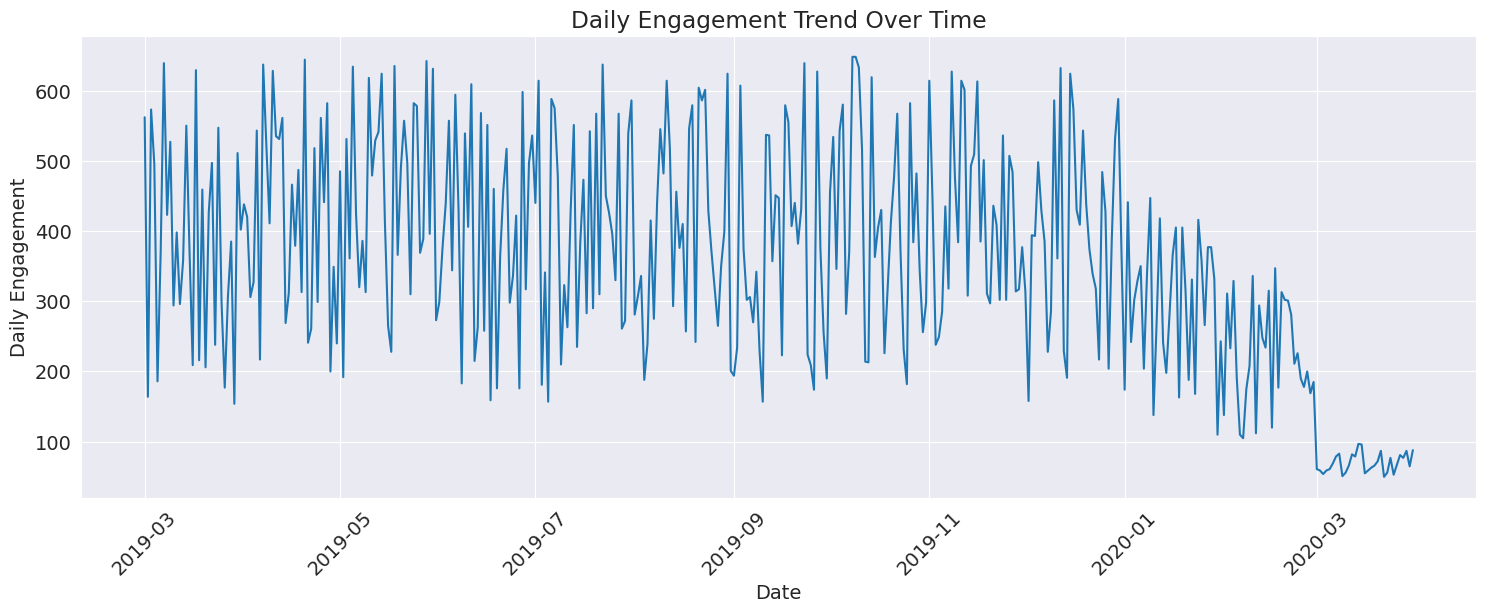

In [41]:
# Visualization: Plot the daily engagement trend over time
plt.plot(daily_engagement['Date_of_Journey'], daily_engagement['daily_engagement'], linestyle='-')
plt.title('Daily Engagement Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Engagement')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

There is the decline in flight bookings since Jan 2020, due to increasing Covid Cases.

### Feature Extraction

In [43]:
df_extended['Date'] = df_extended['Date_of_Journey'].dt.date  # Create a new column for the date
# Extracting additional columns
df_extended['Day_of_Week'] = df_extended['Date_of_Journey'].dt.day_of_week  # Day of the week (Monday is 0 and Sunday is 6)
df_extended['Day'] = df_extended['Date_of_Journey'].dt.day  # Day of the month
df_extended['Month'] = df_extended['Date_of_Journey'].dt.month  # Month
df_extended['Year'] = df_extended['Date_of_Journey'].dt.year  # Year
df_extended['Is_Weekend'] = df_extended['Date_of_Journey'].dt.weekday // 5  # Binary indicator for the weekend (1 if Saturday or Sunday, 0 otherwise)

In [44]:
monthly_engagement = df_extended.groupby('Month').size().reset_index(name='monthly_engagement')

<ipython-input-52-8c61a3c2aec9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(monthly_engagement['monthly_engagement'], palette='viridis')


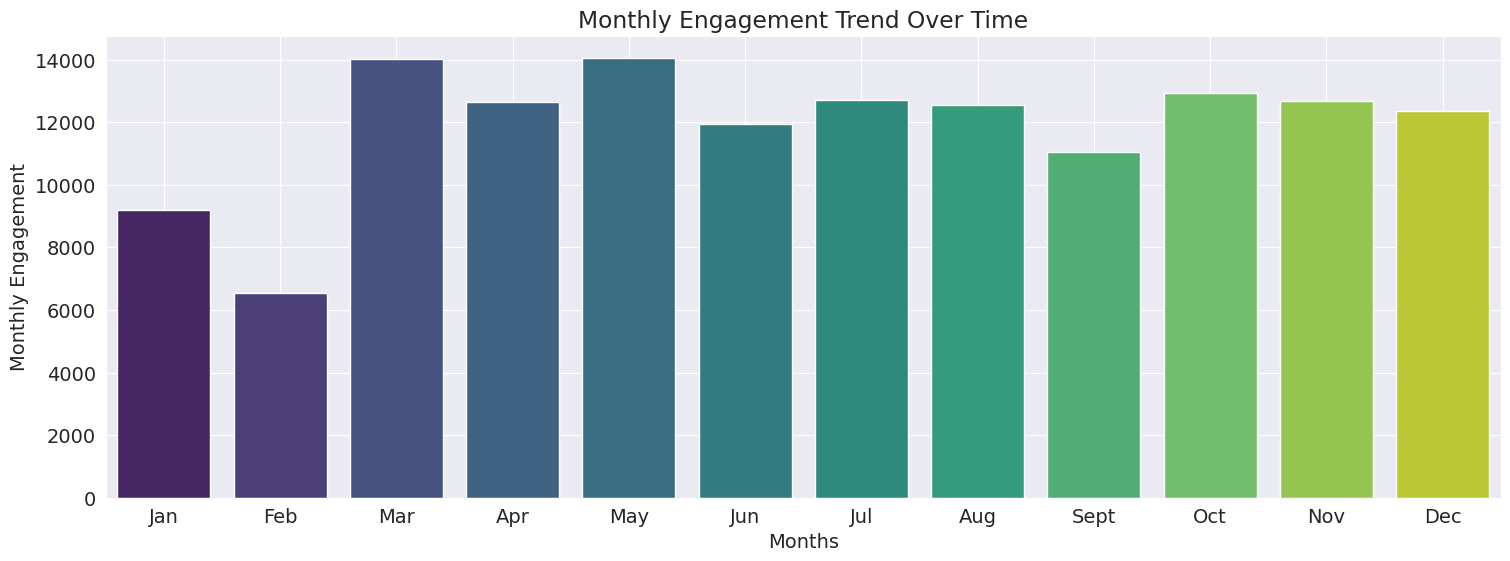

In [52]:
# Visualization: Plot the daily engagement trend over time
sns.barplot(monthly_engagement['monthly_engagement'], palette='viridis')
plt.title('Monthly Engagement Trend Over Time')
plt.xlabel('Months')
plt.ylabel('Monthly Engagement')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

In [46]:
weekly_engagement = df_extended.groupby('Day_of_Week').size().reset_index(name='weekly_engagement')  # Group data by day of the week and count messages

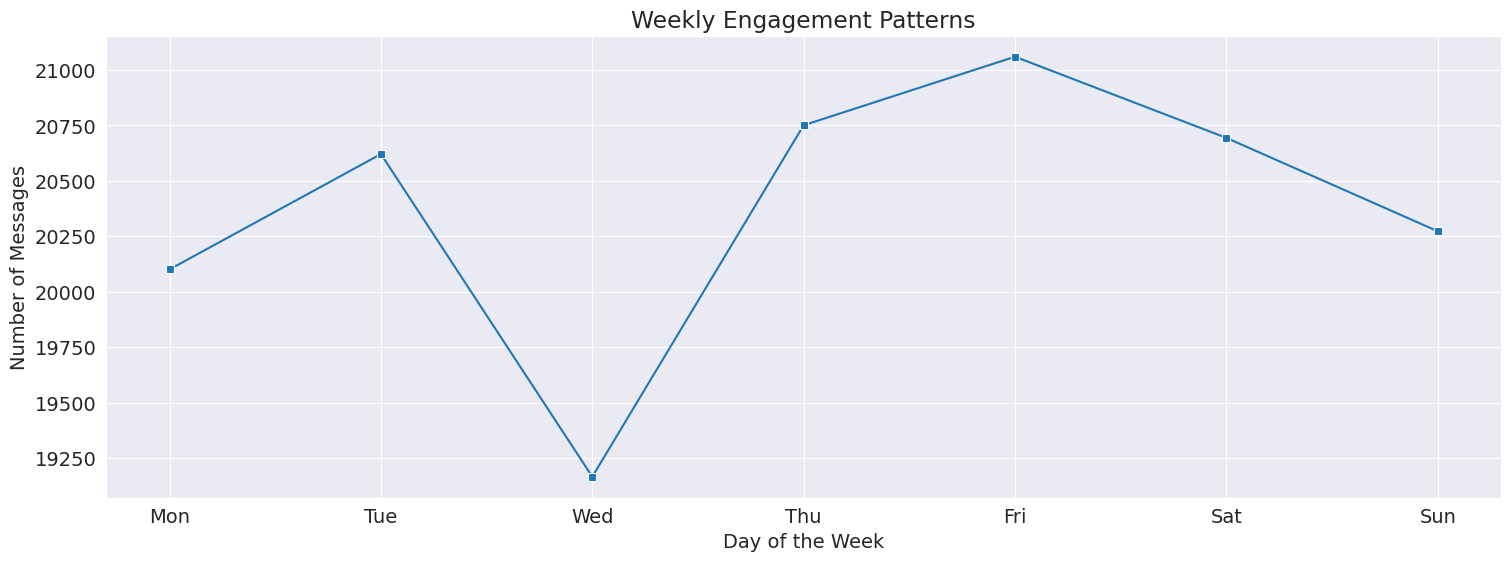

In [54]:
# Visualization: Examine weekly engagement patterns through a line chart
sns.lineplot(x='Day_of_Week', y='weekly_engagement', data=weekly_engagement, marker="s")
plt.title('Weekly Engagement Patterns')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Messages')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()

In [50]:
df_extended['Airline'].value_counts()

Airline
Jet Airways                          50712
IndiGo                               27698
Air India                            23286
Multiple carriers                    16449
SpiceJet                             10945
Vistara                               6318
Air Asia                              4448
GoAir                                 2514
Multiple carriers Premium economy      155
Jet Airways Business                    78
Vistara Premium economy                 54
Trujet                                   9
Name: count, dtype: int64

<ipython-input-55-368ae3161183>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airline_counts.values, y=airline_counts.index, palette='viridis')


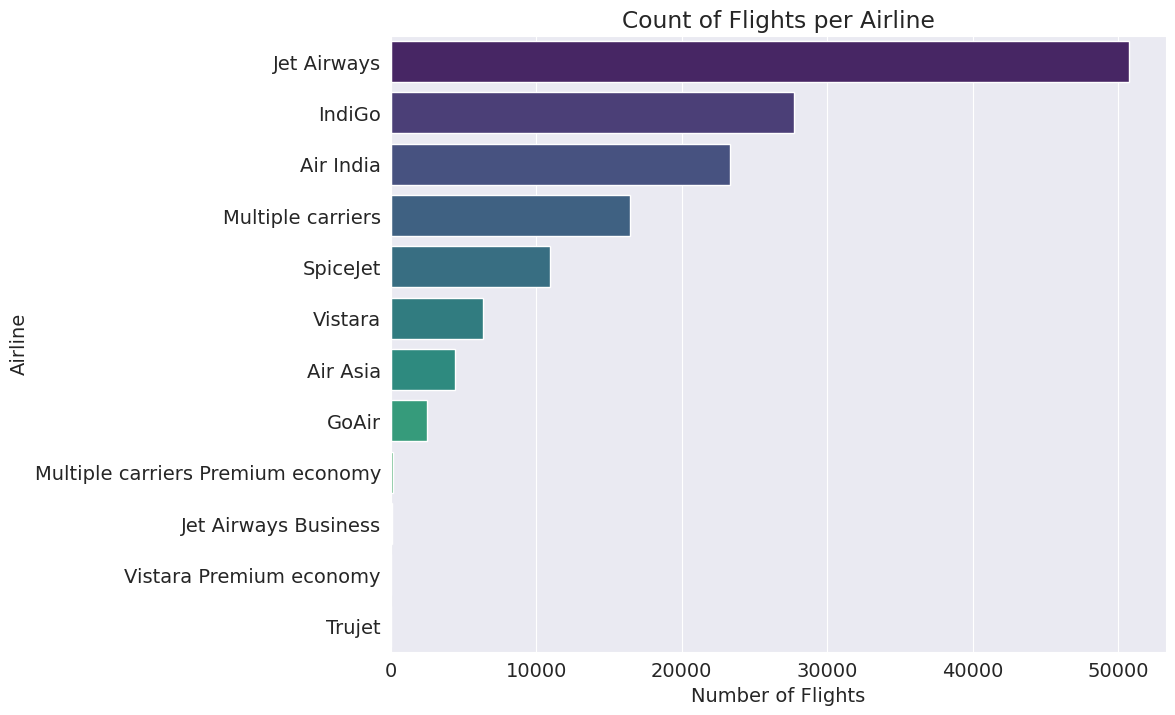

In [55]:
# Get the value counts of airlines and sort them in increasing order
airline_counts = df_extended['Airline'].value_counts().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x=airline_counts.values, y=airline_counts.index, palette='viridis')

# Add titles and labels
plt.title('Count of Flights per Airline')
plt.xlabel('Number of Flights')
plt.ylabel('Airline')
plt.show()

<ipython-input-56-ed9e0385fc84>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airline_counts.values, y=airline_counts.index, palette='viridis')


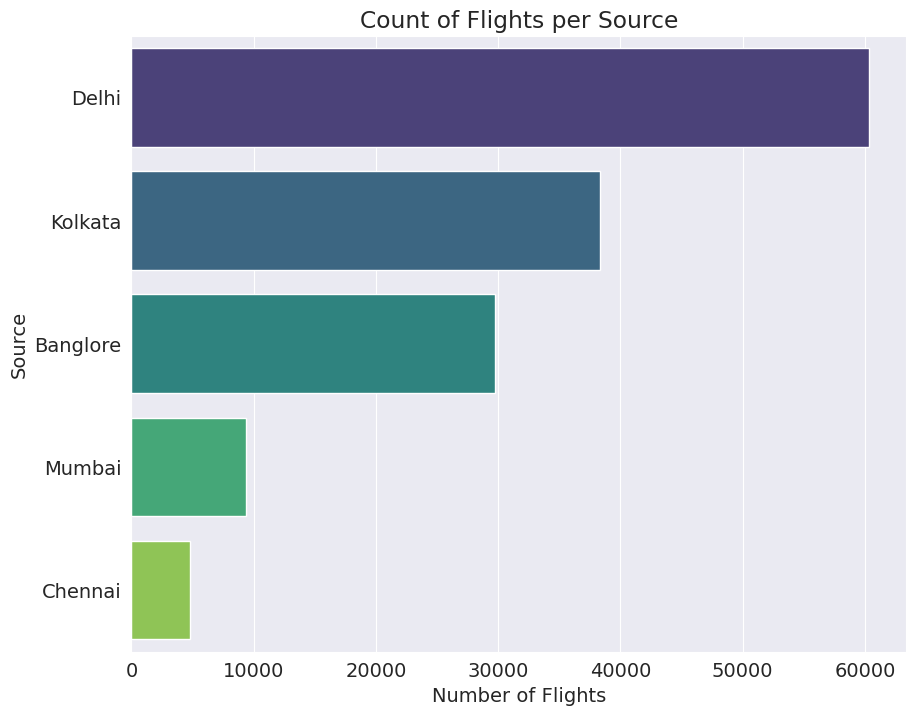

In [56]:
# Get the value counts of airlines and sort them in increasing order
airline_counts = df_extended['Source'].value_counts().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x=airline_counts.values, y=airline_counts.index, palette='viridis')

# Add titles and labels
plt.title('Count of Flights per Source')
plt.xlabel('Number of Flights')
plt.ylabel('Source')
plt.show()

<ipython-input-57-c312b1b9ced2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airline_counts.values, y=airline_counts.index, palette='viridis')


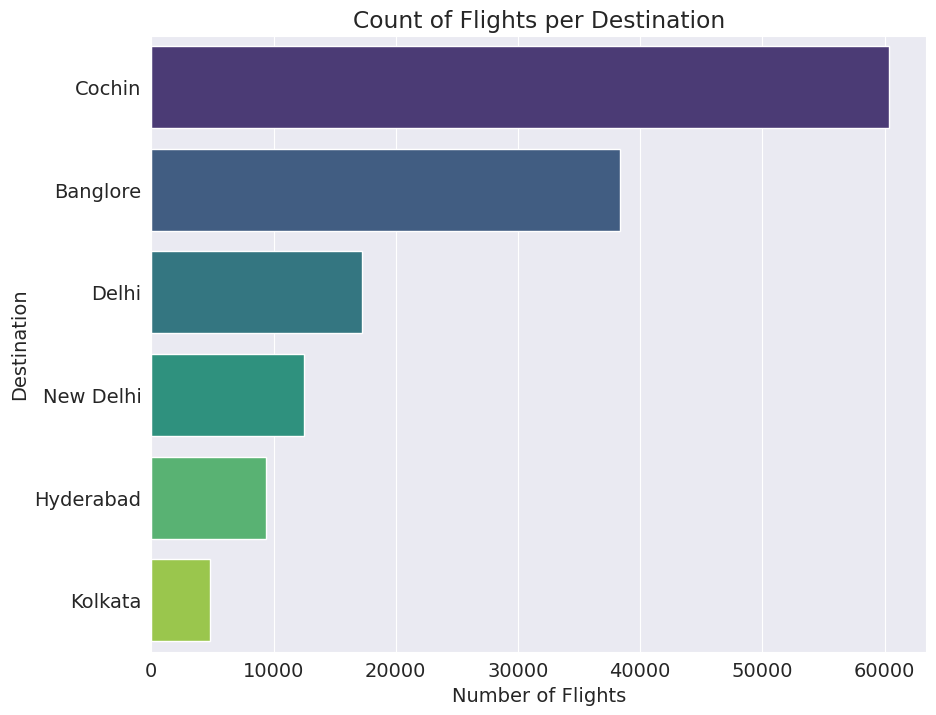

In [57]:
# Get the value counts of airlines and sort them in increasing order
airline_counts = df_extended['Destination'].value_counts().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x=airline_counts.values, y=airline_counts.index, palette='viridis')

# Add titles and labels
plt.title('Count of Flights per Destination')
plt.xlabel('Number of Flights')
plt.ylabel('Destination')
plt.show()

In [58]:
df_extended.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142666 entries, 0 to 142665
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Airline          142666 non-null  object        
 1   Date_of_Journey  142666 non-null  datetime64[ns]
 2   Source           142666 non-null  object        
 3   Destination      142666 non-null  object        
 4   Route            142656 non-null  object        
 5   Additional_Info  142666 non-null  object        
 6   Price            114105 non-null  float64       
 7   Date             142666 non-null  object        
 8   Day_of_Week      142666 non-null  int32         
 9   Day              142666 non-null  int32         
 10  Month            142666 non-null  int32         
 11  Year             142666 non-null  int32         
 12  Is_Weekend       142666 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(5), object(6)
memory usage: 11.4+ 

In [60]:
df_extended["Price"].isnull().sum()

28561

In [67]:
dfresult = df_extended.dropna(subset=['Price'])
dfresult = dfresult.reset_index()
dfresult = dfresult.drop(columns=['index'])
dfresult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114105 entries, 0 to 114104
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Airline          114105 non-null  object        
 1   Date_of_Journey  114105 non-null  datetime64[ns]
 2   Source           114105 non-null  object        
 3   Destination      114105 non-null  object        
 4   Route            114095 non-null  object        
 5   Additional_Info  114105 non-null  object        
 6   Price            114105 non-null  float64       
 7   Date             114105 non-null  object        
 8   Day_of_Week      114105 non-null  int32         
 9   Day              114105 non-null  int32         
 10  Month            114105 non-null  int32         
 11  Year             114105 non-null  int32         
 12  Is_Weekend       114105 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(5), object(6)
memory usage: 9.1+ M

In [68]:
dfresult

,Airline,Date_of_Journey,Source,Destination,Route,Additional_Info,Price,Date,Day_of_Week,Day,Month,Year,Is_Weekend
0,IndiGo,2019-03-01,Delhi,Cochin,DEL → LKO → COK,No info,7189.0,2019-03-01,4,1,3,2019,0
1,Air India,2019-03-01,Mumbai,Hyderabad,BOM → HYD,No info,3100.0,2019-03-01,4,1,3,2019,0
2,IndiGo,2019-03-01,Banglore,New Delhi,BLR → DEL,No info,7648.0,2019-03-01,4,1,3,2019,0
3,Air India,2019-03-01,Delhi,Cochin,DEL → BLR → COK,No info,8991.0,2019-03-01,4,1,3,2019,0
4,Jet Airways,2019-03-01,Kolkata,Banglore,CCU → BOM → BLR,In-flight meal not included,8529.0,2019-03-01,4,1,3,2019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114100,Jet Airways,2020-03-31,Delhi,Cochin,DEL → BOM → COK,In-flight meal not included,10318.4,2020-03-31,1,31,3,2020,0
114101,Jet Airways,2020-03-31,Delhi,Cochin,DEL → BOM → COK,No info,12443.2,2020-03-31,1,31,3,2020,0
114102,IndiGo,2020-03-31,Delhi,Cochin,DEL → HYD → MAA → COK,No info,5195.2,2020-03-31,1,31,3,2020,0
114103,Air Asia,2020-03-31,Kolkata,Banglore,CCU → BLR,No info,3045.6,2020-03-31,1,31,3,2020,0


### Model Building

In [70]:
# Aggregating data by date and summing up the prices to get the total demand
df_demand = dfresult.groupby('Date_of_Journey').size().reset_index()
df_demand.columns = ['Date', 'Total_Demand_of_Flights']

In [71]:
df_demand

,Date,Total_Demand_of_Flights
0,2019-03-01,459
1,2019-03-02,131
2,2019-03-03,456
3,2019-03-04,387
4,2019-03-05,144
...,...,...
392,2020-03-27,69
393,2020-03-28,62
394,2020-03-29,70
395,2020-03-30,56


### Perform Augmented Dickey–Fuller test:

In [73]:
from statsmodels.tsa.stattools import adfuller

In [75]:
print('Results of Dickey Fuller Test:')
adftest = adfuller(df_demand['Total_Demand_of_Flights'], autolag='AIC') # AIC = It gives the info about what you want in TimeSeries
                                                                # (exact or actual values) and analysis the difference btw them

# Extract and print the results
adf_statistic = adftest[0]
p_value = adftest[1]
used_lag = adftest[2]
n_obs = adftest[3]
critical_values = adftest[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print(f'Number of lags used: {used_lag}')
print(f'Number of observations: {n_obs}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

Results of Dickey Fuller Test:
ADF Statistic: -2.249705146955716
p-value: 0.1887021584435854
Number of lags used: 6
Number of observations: 390
Critical Values:
   1%: -3.4472291365835566
   5%: -2.8689795375849223
   10%: -2.5707330834976987


Note: For a Time series to be stationary, its ADCF test should have:

* `p-value` to be **low** (according to the null hypothesis)
* The `critical values` at 1%,5%,10% confidence intervals should be as **close as possible to the Test Statistics**

From the above ADCF test result, we see that p-value(at max can be 1.0) is very large. Also critical values are no where close to the Test Statistics.

Hence, we can safely say that our **Time Series** at the moment is **not stationary**.

### Applying Transformations

If the series is found to be non-stationary (typically if the p-value > 0.05), will apply transformations to make it stationary.

I will explore **differencing** and **log transformation**:

#### Differencing

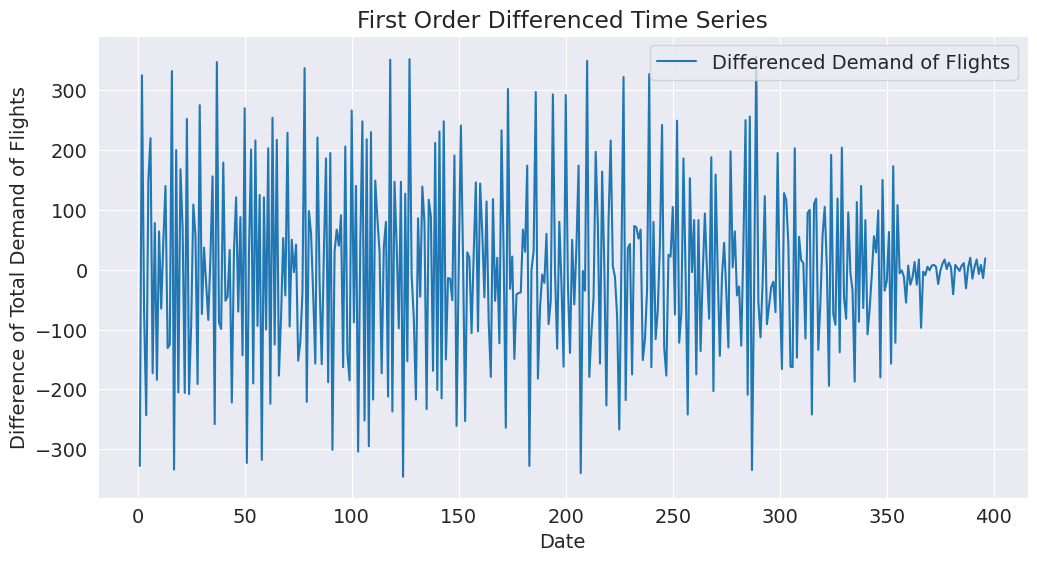

In [84]:
# Apply first order differencing
df_diff = df_demand['Total_Demand_of_Flights'].diff().dropna()

# Plot the differenced data
plt.figure(figsize=(12, 6))
plt.plot(df_diff, label='Differenced Demand of Flights')
plt.title('First Order Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Difference of Total Demand of Flights')
plt.legend()
plt.show()


#### Log Transformation

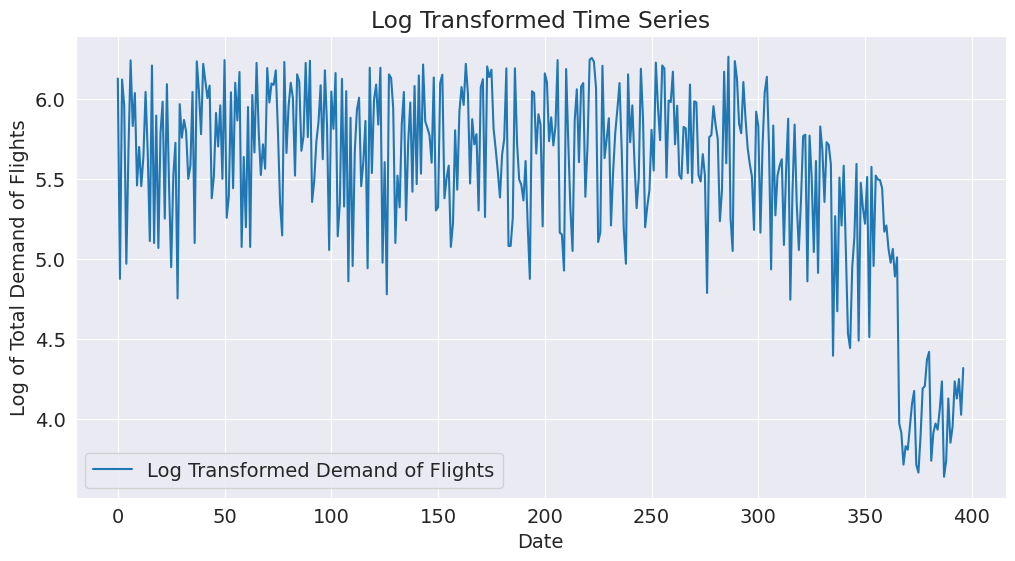

In [85]:
# Apply log transformation
df_log = np.log(df_demand['Total_Demand_of_Flights'].replace(0, np.nan)).dropna()

# Plot the log-transformed data
plt.figure(figsize=(12, 6))
plt.plot(df_log, label='Log Transformed Demand of Flights')
plt.title('Log Transformed Time Series')
plt.xlabel('Date')
plt.ylabel('Log of Total Demand of Flights')
plt.legend()
plt.show()

### Recheck Stationarity

After applying the transformations, we should recheck for stationarity using the ADF test.

In [86]:
# ADF test for the differenced data
result_diff = adfuller(df_diff)
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])

# ADF test for the log-transformed data
result_log = adfuller(df_log)
print('ADF Statistic (Log Transformed):', result_log[0])
print('p-value (Log Transformed):', result_log[1])

ADF Statistic (Differenced): -10.774827782011862
p-value (Differenced): 2.3342002652318724e-19
ADF Statistic (Log Transformed): -1.0161312234582078
p-value (Log Transformed): 0.7473354343537573


**Differenced Data:**

* **ADF Statistic:** A more negative value indicates stronger evidence against the null hypothesis of non-stationarity. In this case, -10.7748 is significantly negative.
* **p-value:** A very small p-value (2.3342e-19) is much less than the typical significance level (0.05), meaning we can reject the null hypothesis. This indicates that the differenced series is stationary.

**Log Transformed Data:**

* **ADF Statistic:** The value -1.0161 is closer to zero, suggesting weaker evidence against non-stationarity.
* **p-value:** The p-value of 0.7473 is much higher than 0.05, indicating that we fail to reject the null hypothesis. Thus, the log-transformed series is not stationary.

### Plotting ACF & PACF

In [91]:
#ACF & PACF plots
from statsmodels.tsa.stattools import acf, pacf

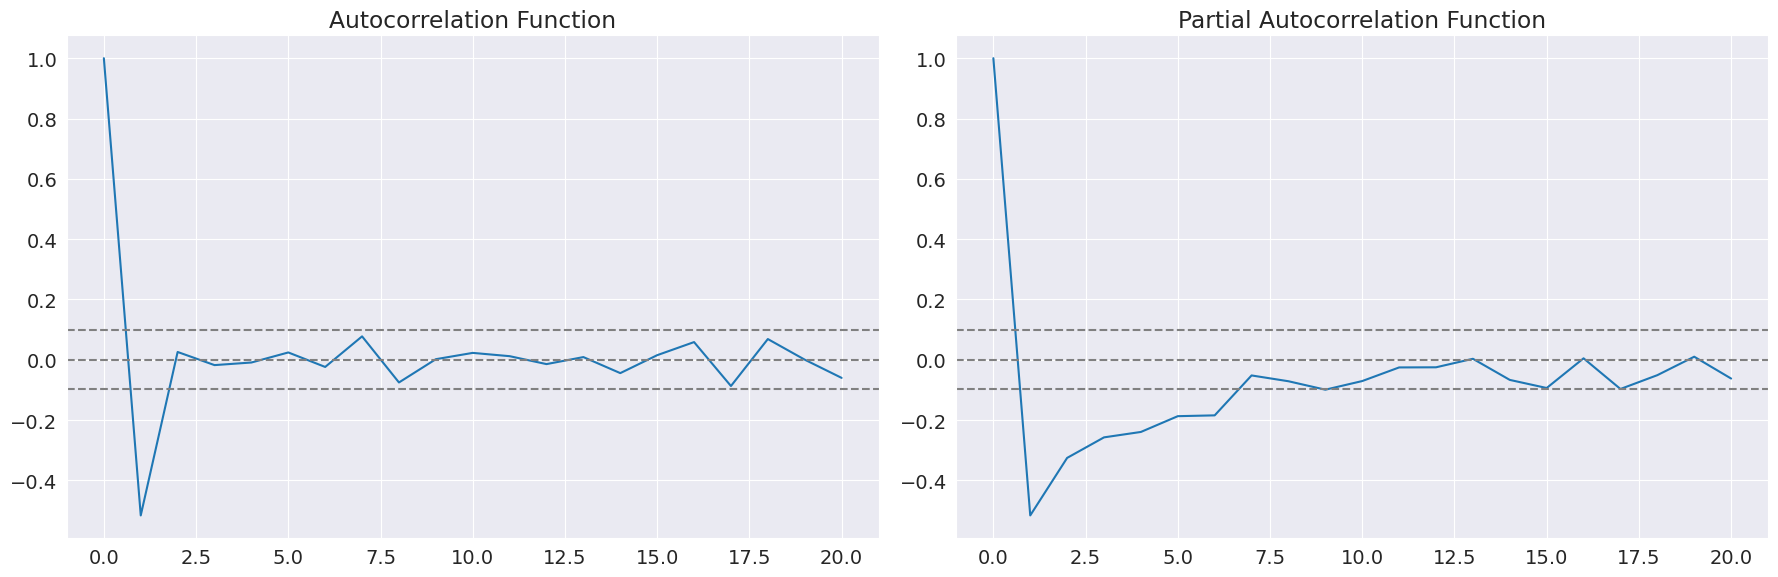

In [92]:
lag_acf = acf(df_diff, nlags=20)
lag_pacf = pacf(df_diff, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_diff)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()

From the ACF graph, we see that curve touches y=0.0 line at x=2. Thus, from theory, Q = 2 From the PACF graph, we see that curve touches y=0.0 line at x=13. Thus, from theory, P = 13.

ARIMA is AR + I + MA. Before, we see an ARIMA model, let us check the results of the individual AR & MA model. Note that, these models will give a value of RSS. Lower RSS values indicate a better model.

### Building Models

ARIMA model is a combination of 3 models :

* AR (p) : Auto Regressive
* I (d) : Integrated
* MA (q) : Moving Average (p,d,q) is known as the order of the ARIMA model.

Values of these parameters are based on the above mentioned models.
* p : Number of auto regressive terms.
* d : Number of differencing orders required to make the time series stationary.
* q : Number of lagged forecast errors in the prediction equation. Selection criteria for the order of ARIMA model :

--- p : Lag value where the Partial Autocorrelation (PACF) graph cuts off or drops to 0 for the 1st instance.

--- d : Number of times differencing is carried out to make the time series stationary.

--- q : Lag value where the Autocorrelation (ACF) graph crosses the upper confidence interval for the 1st instance.

In [93]:
train_size = int(len(df_diff) * 0.8)
train, test = df_diff.iloc[:train_size], df_diff.iloc[train_size:]

In [94]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# AR+I+MA = ARIMA model
model = ARIMA(train, order=(2,13,0))
results_ARIMA = model.fit()

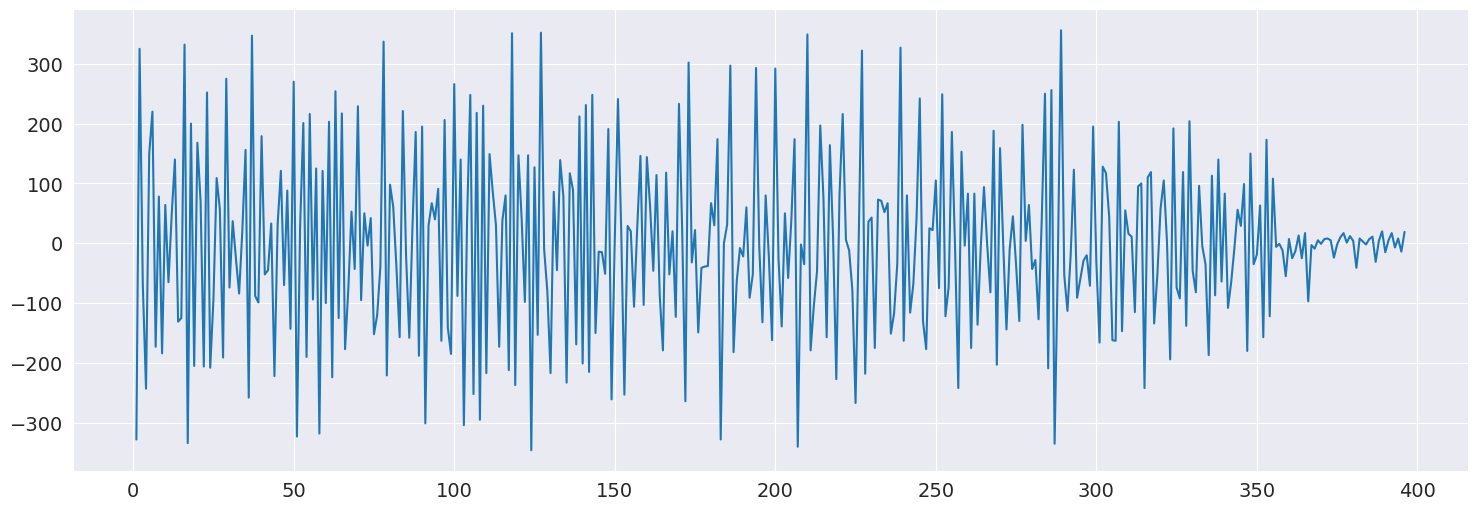

In [107]:
plt.plot(df_diff)

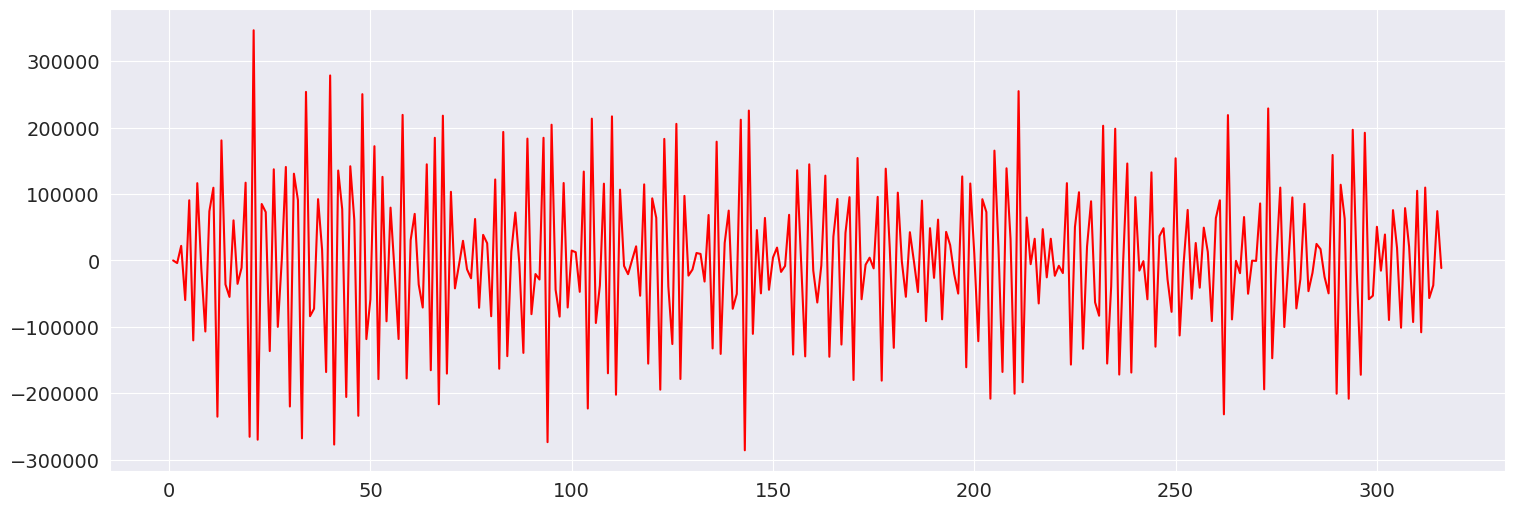

In [108]:
plt.plot(results_ARIMA.fittedvalues, color='red')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Plotting ARIMA model


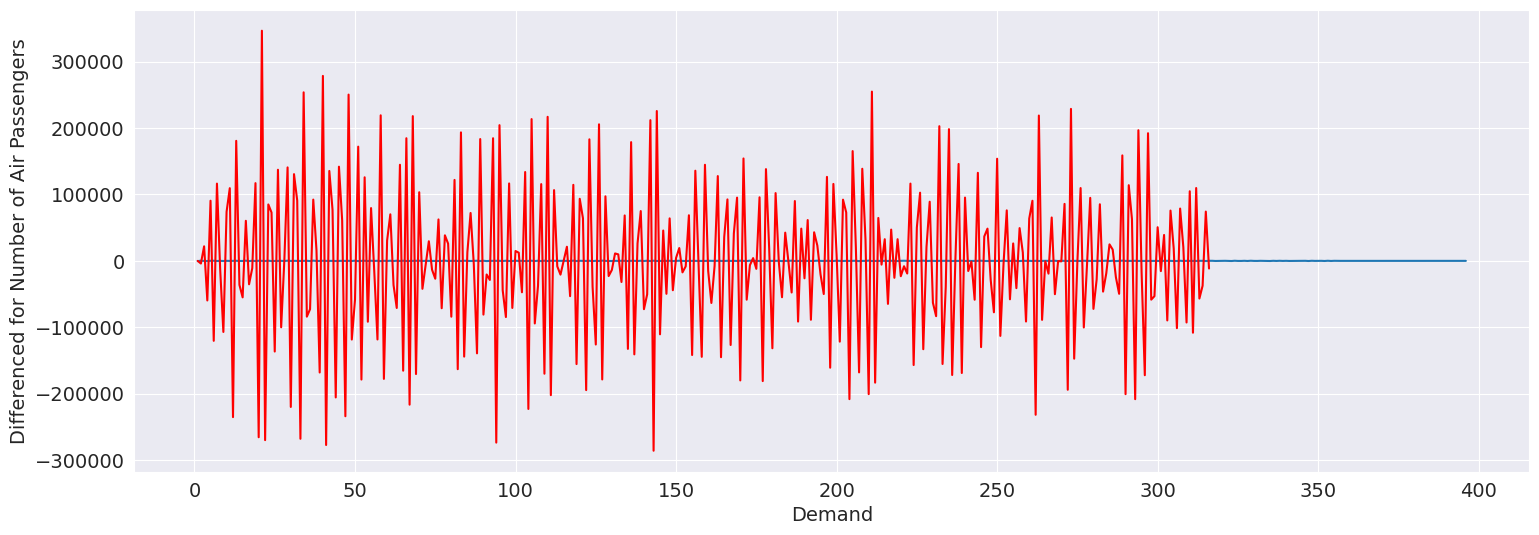

In [104]:
plt.plot(df_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.xlabel('Demand')
plt.ylabel('Differenced for Number of Air Passengers')
print('Plotting ARIMA model')

In [110]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

1        0.000000
2    -3958.178974
3    21918.702481
4   -59592.285233
5    90578.368641
dtype: float64


In [111]:
#Convert to cumulative sum

predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

1          0.000000
2      -3958.178974
3      17960.523507
4     -41631.761726
5      48946.606915
           ...     
312    51656.212525
313    -5018.984828
314   -42483.348245
315    31744.579644
316    20256.307695
Length: 316, dtype: float64


In [113]:
predictions_ARIMA = pd.Series(df_diff.iloc[0], index=df_diff.index)
predictions_ARIMA = predictions_ARIMA.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA.head()

1     -328.000000
2    -4286.178974
3    17632.523507
4   -41959.761726
5    48618.606915
dtype: float64

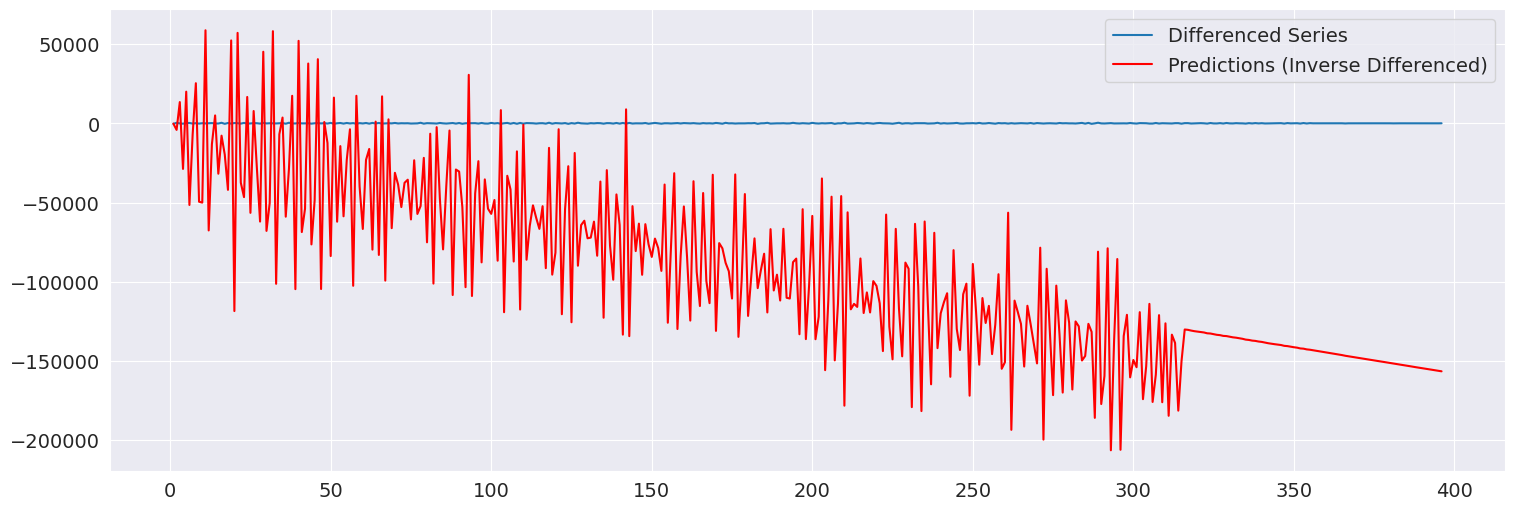

In [114]:
# Inverse differencing
# Get the last value of the original series before differencing
last_value = df_demand["Total_Demand_of_Flights"]

# Create a cumulative sum of the differenced predictions
predictions_inverse_diff = predictions_ARIMA.cumsum()

# Add the last original value to the cumulative sum of differenced predictions
predictions_inverse_diff = predictions_inverse_diff + last_value

# Plotting the original differenced series and the predictions
plt.plot(df_diff, label='Differenced Series')
plt.plot(predictions_inverse_diff, label='Predictions (Inverse Differenced)', color='red')
plt.legend()
plt.show()

Clearly, due to Covid-19, the Demand of Flights are decreasing. There is lose to our business due to World-Wide Lockdown.

### Conculsion:

Due to Travel Restrictions and Lockdowns as countries closed their borders and restricted non-essential travel to contain the virus, the number of domestic and international flights declined.

Consequently, airlines experienced a sharp drop in passenger numbers as flights were canceled and new bookings plummeted.
